# Using Predictive Power Score to Pinpoint Non-linear Correlations

In [1]:
#!pip install ppscore

    100% |████████████████████████████████| 9.5MB 916kB/s ta 0:00:011   18% |██████                          | 1.8MB 1.1MB/s eta 0:00:08
  Stored in directory: /home/amrit/.cache/pip/wheels/3a/16/cb/4768ae3fd9f02af8cd6d880b9095281cc62bb1748fac67fdc4
Successfully built ppscore
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [2]:
import pandas as pd
import numpy as np
import ppscore as pps

In [3]:
df = pd.DataFrame()

In [4]:
df

""


In [5]:
df['x'] = np.random.uniform(-2, 2, 10000)

In [6]:
df.head()

,x
0,1.440812
1,-1.706686
2,-0.259554
3,-0.713261
4,-0.981332


In [7]:
df['error'] = np.random.uniform(-0.5, 0.5, 10000)

In [8]:
df.head()

,x,error
0,1.440812,0.359156
1,-1.706686,-0.436898
2,-0.259554,0.210189
3,-0.713261,-0.410340
4,-0.981332,-0.126836


In [9]:
df['y'] = df['x'] * df['x'] + df['error']

In [10]:
df.head()

,x,error,y
0,1.440812,0.359156,2.435095
1,-1.706686,-0.436898,2.475879
2,-0.259554,0.210189,0.277558
3,-0.713261,-0.410340,0.098401
4,-0.981332,-0.126836,0.836177


In [11]:
df['x'].corr(df['y'])

-0.00889068438991888

In [12]:
df.corr()

,x,error,y
x,1.000000,-0.014784,-0.008891
error,-0.014784,1.000000,0.236867
y,-0.008891,0.236867,1.000000


In [13]:
pps.score(df, 'x', 'y')

{'x': 'x',
 'y': 'y',
 'ppscore': 0.6685544206181002,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.0145241148775717,
 'model_score': 0.3362595330525058,
 'model': DecisionTreeRegressor()}

In [14]:
pps.score(df, 'y', 'x')

{'x': 'y',
 'y': 'x',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.9927313163193341,
 'model_score': 1.0667650723379827,
 'model': DecisionTreeRegressor()}

In [15]:
pps.predictors(df, 'y')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,y,0.668554,regression,True,mean absolute error,1.014524,0.336260,DecisionTreeRegressor()
1,error,y,0.000000,regression,True,mean absolute error,1.014524,1.310902,DecisionTreeRegressor()


In [16]:
pps.predictors(df, 'x')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,error,x,0,regression,True,mean absolute error,0.992731,1.324221,DecisionTreeRegressor()
1,y,x,0,regression,True,mean absolute error,0.992731,1.066765,DecisionTreeRegressor()


In [17]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.250787,0.336281,DecisionTreeRegressor()
2,x,y,0.668554,regression,True,mean absolute error,1.014524,0.336260,DecisionTreeRegressor()
3,error,x,0.000000,regression,True,mean absolute error,0.992731,1.324221,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.014524,1.310902,DecisionTreeRegressor()
6,y,x,0.000000,regression,True,mean absolute error,0.992731,1.066765,DecisionTreeRegressor()
7,y,error,0.000000,regression,True,mean absolute error,0.250787,0.280531,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


### Analysing and Visualising Results

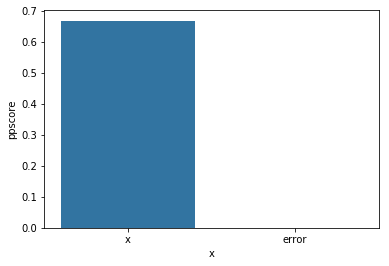

In [19]:
import seaborn as sns
predictors_df = pps.predictors(df, y = 'y')
sns.barplot(data = predictors_df, x = 'x', y = 'ppscore')

In [21]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns = 'x', index = 'y', values = 'ppscore')
matrix_df

x,error,x,y
y,,,
error,1.0,0.000000,0.0
x,0.0,1.000000,0.0
y,0.0,0.668554,1.0


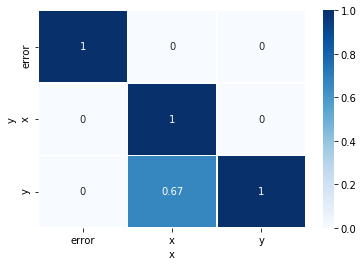

In [22]:
sns.heatmap(matrix_df, vmin = 0, vmax = 1, cmap = 'Blues', linewidths = 0.5, annot = True)